# Table of Contents
 <p><div class="lev2 toc-item"><a href="#OBTENIENDO-DATOS" data-toc-modified-id="OBTENIENDO-DATOS-01"><span class="toc-item-num">0.1&nbsp;&nbsp;</span>OBTENIENDO DATOS</a></div><div class="lev3 toc-item"><a href="#GEODATOS-SHAPEFILE" data-toc-modified-id="GEODATOS-SHAPEFILE-011"><span class="toc-item-num">0.1.1&nbsp;&nbsp;</span>GEODATOS SHAPEFILE</a></div><div class="lev3 toc-item"><a href="#PC-TAS,-BASE-DE-DATOS" data-toc-modified-id="PC-TAS,-BASE-DE-DATOS-012"><span class="toc-item-num">0.1.2&nbsp;&nbsp;</span>PC-TAS, BASE DE DATOS</a></div><div class="lev3 toc-item"><a href="#CÓDIGOS-ISO-2-&amp;-ISO-3" data-toc-modified-id="CÓDIGOS-ISO-2-&amp;-ISO-3-013"><span class="toc-item-num">0.1.3&nbsp;&nbsp;</span>CÓDIGOS ISO-2 &amp; ISO-3</a></div><div class="lev3 toc-item"><a href="#DATA-WORLD-BANK" data-toc-modified-id="DATA-WORLD-BANK-014"><span class="toc-item-num">0.1.4&nbsp;&nbsp;</span>DATA WORLD BANK</a></div><div class="lev2 toc-item"><a href="#ANÁLISIS-DEL-COMERCIO-EXTERIOR-DE-UN-PAÍS" data-toc-modified-id="ANÁLISIS-DEL-COMERCIO-EXTERIOR-DE-UN-PAÍS-02"><span class="toc-item-num">0.2&nbsp;&nbsp;</span>ANÁLISIS DEL COMERCIO EXTERIOR DE UN PAÍS</a></div><div class="lev1 toc-item"><a href="#PRESENTACIÓN-DEL-PAIS" data-toc-modified-id="PRESENTACIÓN-DEL-PAIS-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>PRESENTACIÓN DEL PAIS</a></div><div class="lev2 toc-item"><a href="#SITUACIÓN-GEOGRÁFICA" data-toc-modified-id="SITUACIÓN-GEOGRÁFICA-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>SITUACIÓN GEOGRÁFICA</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-11001"><span class="toc-item-num">1.1.0.0.1&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev2 toc-item"><a href="#HISTORIA" data-toc-modified-id="HISTORIA-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>HISTORIA</a></div><div class="lev2 toc-item"><a href="#RECURSOS-NATURALES" data-toc-modified-id="RECURSOS-NATURALES-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>RECURSOS NATURALES</a></div><div class="lev2 toc-item"><a href="#GRUPOS-ECONÓMICOS" data-toc-modified-id="GRUPOS-ECONÓMICOS-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>GRUPOS ECONÓMICOS</a></div><div class="lev2 toc-item"><a href="#INSTITUCIONES-INTERNACIONALES" data-toc-modified-id="INSTITUCIONES-INTERNACIONALES-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>INSTITUCIONES INTERNACIONALES</a></div><div class="lev2 toc-item"><a href="#RASGOS-ECONÓMICOS" data-toc-modified-id="RASGOS-ECONÓMICOS-16"><span class="toc-item-num">1.6&nbsp;&nbsp;</span>RASGOS ECONÓMICOS</a></div><div class="lev2 toc-item"><a href="#SECTORES-RELEVANTES-EN-LA-PRODUCCIÓN-Y-COMERCIO-EXTERIOR" data-toc-modified-id="SECTORES-RELEVANTES-EN-LA-PRODUCCIÓN-Y-COMERCIO-EXTERIOR-17"><span class="toc-item-num">1.7&nbsp;&nbsp;</span>SECTORES RELEVANTES EN LA PRODUCCIÓN Y COMERCIO EXTERIOR</a></div><div class="lev2 toc-item"><a href="#EVOLUCIÓN-MACROECONÓMICA-COMPARADA" data-toc-modified-id="EVOLUCIÓN-MACROECONÓMICA-COMPARADA-18"><span class="toc-item-num">1.8&nbsp;&nbsp;</span>EVOLUCIÓN MACROECONÓMICA COMPARADA</a></div><div class="lev2 toc-item"><a href="#RELACIÓN-REAL-DE-INTERCAMBIO" data-toc-modified-id="RELACIÓN-REAL-DE-INTERCAMBIO-19"><span class="toc-item-num">1.9&nbsp;&nbsp;</span>RELACIÓN REAL DE INTERCAMBIO</a></div><div class="lev2 toc-item"><a href="#POLÍTICAS-ECONÓMICAS" data-toc-modified-id="POLÍTICAS-ECONÓMICAS-110"><span class="toc-item-num">1.10&nbsp;&nbsp;</span>POLÍTICAS ECONÓMICAS</a></div><div class="lev1 toc-item"><a href="#EVOLUCIÓN-DEL-COMERCIO-Y-SUS-DETERMINANTES-MACROECONÓMICOS" data-toc-modified-id="EVOLUCIÓN-DEL-COMERCIO-Y-SUS-DETERMINANTES-MACROECONÓMICOS-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EVOLUCIÓN DEL COMERCIO Y SUS DETERMINANTES MACROECONÓMICOS</a></div><div class="lev2 toc-item"><a href="#INDICADORES" data-toc-modified-id="INDICADORES-21"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>INDICADORES</a></div><div class="lev2 toc-item"><a href="#EVOLUCIÓN-DEL-COMERCIO" data-toc-modified-id="EVOLUCIÓN-DEL-COMERCIO-22"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>EVOLUCIÓN DEL COMERCIO</a></div><div class="lev3 toc-item"><a href="#NOMINAL" data-toc-modified-id="NOMINAL-221"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>NOMINAL</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-2211"><span class="toc-item-num">2.2.1.1&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-2212"><span class="toc-item-num">2.2.1.2&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-2213"><span class="toc-item-num">2.2.1.3&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-22131"><span class="toc-item-num">2.2.1.3.1&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-22132"><span class="toc-item-num">2.2.1.3.2&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-22133"><span class="toc-item-num">2.2.1.3.3&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev3 toc-item"><a href="#REAL" data-toc-modified-id="REAL-222"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>REAL</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-2221"><span class="toc-item-num">2.2.2.1&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-2222"><span class="toc-item-num">2.2.2.2&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-22221"><span class="toc-item-num">2.2.2.2.1&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-22222"><span class="toc-item-num">2.2.2.2.2&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-2223"><span class="toc-item-num">2.2.2.3&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-22231"><span class="toc-item-num">2.2.2.3.1&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev2 toc-item"><a href="#DETERMINANTES-MACROECONÓMICOS:" data-toc-modified-id="DETERMINANTES-MACROECONÓMICOS:-23"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>DETERMINANTES MACROECONÓMICOS:</a></div><div class="lev1 toc-item"><a href="#DISTRIBUCIÓN-GEOGRÁFICA-DE-M-Y-X" data-toc-modified-id="DISTRIBUCIÓN-GEOGRÁFICA-DE-M-Y-X-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>DISTRIBUCIÓN GEOGRÁFICA DE M Y X</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-3001"><span class="toc-item-num">3.0.0.1&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-30011"><span class="toc-item-num">3.0.0.1.1&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-30012"><span class="toc-item-num">3.0.0.1.2&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-3002"><span class="toc-item-num">3.0.0.2&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-30021"><span class="toc-item-num">3.0.0.2.1&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev5 toc-item"><a href="#FIGURA" data-toc-modified-id="FIGURA-30022"><span class="toc-item-num">3.0.0.2.2&nbsp;&nbsp;</span>FIGURA</a></div><div class="lev1 toc-item"><a href="#COMPETITIVIDAD-PRECIO-O-COSTE" data-toc-modified-id="COMPETITIVIDAD-PRECIO-O-COSTE-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>COMPETITIVIDAD PRECIO O COSTE</a></div><div class="lev1 toc-item"><a href="#COMPETITIVIDAD-ESTRUCTURAL" data-toc-modified-id="COMPETITIVIDAD-ESTRUCTURAL-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>COMPETITIVIDAD ESTRUCTURAL</a></div><div class="lev1 toc-item"><a href="#ESPECIALIZACIÓN-COMERCIAL" data-toc-modified-id="ESPECIALIZACIÓN-COMERCIAL-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>ESPECIALIZACIÓN COMERCIAL</a></div><div class="lev2 toc-item"><a href="#INDICE-DE-DEPENDENCIA" data-toc-modified-id="INDICE-DE-DEPENDENCIA-61"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>INDICE DE DEPENDENCIA</a></div><div class="lev2 toc-item"><a href="#INDICE-DE-ESPECIALIZACIÓN" data-toc-modified-id="INDICE-DE-ESPECIALIZACIÓN-62"><span class="toc-item-num">6.2&nbsp;&nbsp;</span>INDICE DE ESPECIALIZACIÓN</a></div><div class="lev2 toc-item"><a href="#SALDO-COMERCIAL-RELATIVO" data-toc-modified-id="SALDO-COMERCIAL-RELATIVO-63"><span class="toc-item-num">6.3&nbsp;&nbsp;</span>SALDO COMERCIAL RELATIVO</a></div><div class="lev3 toc-item"><a href="#IMPORTANCIA-RELATIVA-DEL-SECTOR-EN-LAS-IMPORTACIONES-Y-EXPORTACIONES." data-toc-modified-id="IMPORTANCIA-RELATIVA-DEL-SECTOR-EN-LAS-IMPORTACIONES-Y-EXPORTACIONES.-631"><span class="toc-item-num">6.3.1&nbsp;&nbsp;</span>IMPORTANCIA RELATIVA DEL SECTOR EN LAS IMPORTACIONES Y EXPORTACIONES.</a></div><div class="lev2 toc-item"><a href="#PRESENTACIÓN-DE-LOS-DATOS:" data-toc-modified-id="PRESENTACIÓN-DE-LOS-DATOS:-64"><span class="toc-item-num">6.4&nbsp;&nbsp;</span>PRESENTACIÓN DE LOS DATOS:</a></div><div class="lev3 toc-item"><a href="#CUADRANTES" data-toc-modified-id="CUADRANTES-641"><span class="toc-item-num">6.4.1&nbsp;&nbsp;</span>CUADRANTES</a></div><div class="lev1 toc-item"><a href="#COMERCIO-INTRAINDUSTRIAL" data-toc-modified-id="COMERCIO-INTRAINDUSTRIAL-7"><span class="toc-item-num">7&nbsp;&nbsp;</span><span class="burk">COMERCIO INTRAINDUSTRIAL</span></a></div><div class="lev4 toc-item"><a href="#CUADRO" data-toc-modified-id="CUADRO-7001"><span class="toc-item-num">7.0.0.1&nbsp;&nbsp;</span>CUADRO</a></div><div class="lev1 toc-item"><a href="#POLITICA-COMERCIAL" data-toc-modified-id="POLITICA-COMERCIAL-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>POLITICA COMERCIAL</a></div><div class="lev1 toc-item"><a href="#RESUMEN-Y-CONCLUSIONES" data-toc-modified-id="RESUMEN-Y-CONCLUSIONES-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>RESUMEN Y CONCLUSIONES</a></div><div class="lev1 toc-item"><a href="#ANEXO" data-toc-modified-id="ANEXO-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>ANEXO</a></div><div class="lev1 toc-item"><a href="#BIBLIOGRAFIA" data-toc-modified-id="BIBLIOGRAFIA-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>BIBLIOGRAFIA</a></div>

In [3]:
# IMPORTAR LIBRERÍAS
# from scipy import integrate

# Extraer datos
import wbdata

# Estandar
import statsmodels.api as sm
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
#from io import StringIO

# Gráficos
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib
import matplotlib.gridspec as gridspec

# Geodata
import geopandas as gp

# Misc
from IPython.display import IFrame
from translate import Translator
translator = Translator(to_lang="es")

In [4]:
%matplotlib inline
# sólo dos decimasl
_ = %precision 2

In [80]:
# load libraries and set plot parameters
from IPython.display import set_matplotlib_formats

# formato tablas

def notacion_esp(x):
    x = "{:,.2f}".format(float(x))
    if len(x.split(".")) == 2:
        x = ",".join([x.split(".")[0].replace(",", "."), 
                      x.split(".")[1]])
    else:
        x
    return x

# tablas formato latex
# pd.set_option('display.notebook_repr_html', True)
# def _repr_latex_(self):
#     return "\centering{%s}" % self.to_latex()
# pd.DataFrame._repr_latex_ = _repr_latex_  # monkey patch pandas DataFrame
pd.set_option('display.float_format', notacion_esp)
pd.set_option('display.max_rows', 500)     # muestra 500 líneas cómo máximo
pd.set_option('display.max_columns', 100)  # muestra 100 columnas como máximo
pd.set_option('display.max_colwidth', 150) # muestra 150 caracteres cómo maxímo en una celda

# formato de los gráficos
plt.style.use(['seaborn-white', 'seaborn-paper'])
matplotlib.rc("font", family="Times New Roman", size=15)

set_matplotlib_formats('pdf', 'png')
plt.rcParams['savefig.dpi'] = 75

plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 16
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 14

# plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = "Times New Roman"
plt.rcParams['font.serif'] = "cm"
# plt.rcParams['text.latex.preamble'] = u"\\usepackage{subdepth}, \\usepackage{type1cm}"

## OBTENIENDO DATOS

### GEODATOS SHAPEFILE

In [49]:
# CARGANDO SHAPEFILE
file_ue = "../data/geodata-ue-28/Data/CNTR_RG_03M_2014.shp"
geodf = gp.read_file(file_ue)

# CODIGO DE PAISES ISO PARA EL SHAPEFILE
cnt_ids = [
    "BE", "EL", "LT", "PT", "BG", "ES", "LU", "RO", "CZ", "FR", "HU", "SI",
    "DK", "HR", "MT", "SK", "DE", "IT", "NL", "FI", "EE", "CY", "AT", "SE",
    "IE", "LV", "PL", "UK"
]

geodf.index = geodf.CNTR_ID
geodf = geodf.loc[cnt_ids, :]
geodf.head()

,CNTR_ID,SHAPE_AREA,SHAPE_LEN,geometry
CNTR_ID,,,,
BE,BE,"3,90","14,01","POLYGON ((6.020999000000018 50.75429550000001, 6.040481 50.74551250000002, 6.036454499999991 50.72006349999998, 6.115294000000006 50.7221139999999..."
EL,EL,"13,77","109,40","(POLYGON ((26.1724835 41.74850099999998, 26.29395099999999 41.71163949999999, 26.35852649999998 41.71183000000002, 26.44613249999998 41.6850435000..."
LT,LT,"9,19","18,80","(POLYGON ((25.05665199999999 56.26473199999998, 25.0920375 56.18604199999999, 25.17126050000002 56.17424649999998, 25.233814 56.19219199999998, 25..."
PT,PT,"9,65","29,60","(POLYGON ((-8.199000500000011 42.15441900000002, -8.183897999999999 42.06940100000003, -8.118477999999982 42.08212300000002, -8.082897000000003 42..."
BG,BG,"12,21","21,37","POLYGON ((28.57888400000002 43.73873900000001, 28.57736606499998 43.71033559300002, 28.57689953200003 43.70160586700001, 28.57384326300001 43.6444..."


### PC-TAS, BASE DE DATOS

(Trade Analytics System)

Han sido obetenidos previamente desde la base de datos de PC-Tas desde un ordenador con dicha licencia. No se si es posible obtenerlos de otra forma.

In [7]:
# DATA PC-TAS ORIGINALES

path = "../data/"
files = !ls ../data/*.XLS
vnames = [f[21:-4] for f in files]

#for i, vn in enumerate(vnames):
#    print(i, vn)

In [8]:
for i, f in enumerate(files):
    globals()[vnames[i]] = pd.read_excel(f, verbose=False);
for i, f in enumerate(files):
    print(i, "variable creada", vnames[i], "\t", f);

*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
*** No CODEPAGE record, no encoding_override: will use 'ascii'
0 variable creada Mchipre 	 ../data/pc-tas-input-Mchipre.XLS
1 variable creada Mgeo 	 ../data/pc-tas-input-Mgeo.XLS
2 variable creada Mue 	 ../data/pc-tas-input-Mue.XLS
3 variable creada Xchipre 	 ../data/pc-tas-input-Xchipre.XLS
4 variable creada Xgeo 	 ../data/pc-tas-input-Xgeo.XLS
5 variable creada Xue 	 ../data/pc-tas-input-Xue.XLS


In [9]:
cols = ["product_cd", "trade_value_5"]

xue = Xue.loc[Xue["reporter_name"] == "SUM REPORTERS", cols]
mue = Mue.loc[Mue["reporter_name"] == "SUM REPORTERS", cols]

xue.columns = ["code", "xue11"]
mue.columns = ["code", "mue11"]

xchipre = Xchipre.loc[:, cols]
mchipre = Mchipre.loc[:, cols]

xchipre.columns = ["code", "xchipre11"]
mchipre.columns = ["code", "mchipre11"]

# juntar las tablas
data = pd.merge(xchipre, mchipre, how="outer", on="code")
data = pd.merge(data, xue, how="outer", on="code")
data = pd.merge(data, mue, how="outer", on="code")
data.sort_values("code", ascending=True, inplace=True)
data.loc[:, "code"] = data.code.apply(str)
data = data.astype("f")
data["code"] = data.code.apply(lambda x: str(int(x)))
data.tail()

,code,xchipre11,mchipre11,xue11,mue11
84,94,"13,00","203,00","82.447,00","76.235,00"
85,95,"2,00","64,00","25.518,00","39.218,00"
86,96,"2,00","16,00","9.496,00","9.786,00"
87,97,"0,00","2,00","9.204,00","8.722,00"
88,99,"0,00","96,00","184.302,00","134.104,00"


In [10]:
# preparación
for i, c in enumerate(Mgeo.columns):
    print(i,c)

0 product_classification_desc
1 product_cd
2 product_desc_long
3 reporter_name
4 partner_name
5 trade_value_1
6 trade_value_2
7 trade_value_3
8 trade_value_4
9 trade_value_5
10 five_year_value_total
11 share_value_1
12 share_value_2
13 share_value_3
14 share_value_4
15 share_value_5
16 scr_index
17 trend_partner


In [11]:
# elegimos las variables
indices = [4,5,9]
Mgeo.iloc[:, indices].head()

,partner_name,trade_value_1,trade_value_5
0,WORLD,8749,8719
1,GREECE,1530,1862
2,ITALY,884,709
3,UNITED KINGDOM,849,768
4,GERMANY,811,707


In [12]:
# Filtrmos columnas y eliminamos la primera fila WORLD
Mgeo = Mgeo.iloc[1:, indices]
Xgeo = Xgeo.iloc[1:, indices]

In [13]:
# renomabramos columnas
cls = "pais x2007 x2011"
Mgeo.columns = cls.replace("x", "m").split()
Xgeo.columns = cls.split()

In [14]:
Mgeo.head()

,pais,m2007,m2011
1,GREECE,1530,1862
2,ITALY,884,709
3,UNITED KINGDOM,849,768
4,GERMANY,811,707
5,ISRAEL,563,888


In [15]:
Xgeo.head()

,pais,x2007,x2011
1,GREECE,295,465
2,FOR SHIPS,233,356
3,UNITED KINGDOM,206,174
4,GERMANY,91,94
5,LEBANON,39,66


### CÓDIGOS ISO-2 & ISO-3

(Ojo, Croacia entra en la UE en 2012)

Código que identifican a los países en bases de datos. Necesitamos códigos de dos dígitos ISO-2 y con tres dígitos ISO-3. Será necesarios para extraer datos de WDI y cualquier otra base de datos.

In [ ]:
# OBTENIENDO LOS CODIGOS DE LOS PAISES DE LOS PAISES DE LA UE-28
# PARA WORLD BANK DATA

url_source = "../data/member_state_of_the_european_union_-_wikipedia_the_free_encyclopedia.html"
ue_df = pd.read_html(url_source, header=0, index_col=0)[0]

# correción de nombres de paises
uecnts = []
for ind in ue_df.index:
    if ind == "United Kingdom[j]":
        uecnts.append(ind[:-3])
        continue
    elif ind == "Slovakia":
        uecnts.append("Slovak")
        continue
    uecnts.append(ind)

# codigo id de los paises de la UE
uecnts_id = []
for ind in uecnts:
    try:
        ueid = wbdata.search_countries(ind, display=0)[0]["id"]
    except:
        ueid = wbdata.search_countries(ind, display=0)
        print(ind, ueid)
    uecnts_id.append(ueid)


# datos de WORLD BANK
wbdata.search_countries("cyprus")

In [ ]:
url9 = "http://www.worldatlas.com/aatlas/ctycodes.htm"
world_codes = pd.read_html(url9, header=0)[0]

In [ ]:
world_codes.head()

In [ ]:
uecountries_df = DataFrame()
uecountries_df["pais"] = uecnts
uecountries_df["id_wb"] = uecnts_id
uecountries_df.sort_values("id_wb", inplace=1)
# uecountries_df["id_shp"] = np.sort(np.array(cnt_ids))
uecountries_df = pd.merge(uecountries_df, world_codes, left_on="id_wb", right_on="A3 (UN)").iloc[:,2:-2]
uecountries_df.columns = "pais shp_code wb_code".split()
uecountries_df.tail()

In [16]:
codes = pd.read_csv("../data/countries-codes-iso.csv", index_col=0)

In [17]:
codes

,pais,shp_code,wb_code
0,Austria,AT,AUT
1,Belgium,BE,BEL
2,Bulgaria,BG,BGR
3,Cyprus,CY,CYP
4,Czech Republic,CZ,CZE
5,Germany,DE,DEU
6,Denmark,DK,DNK
7,Spain,ES,ESP
8,Estonia,EE,EST
9,Finland,FI,FIN


### DATA WORLD BANK

Obteniendo los datos de la api del banco mundial (WDI api)

In [10]:
# busqueda de indicadores necesarios

q1 = "gdp (constant LCU)"
q2 = "gdp (current lcu)"
q3 = "imports of goods and services (constant lcu)"
q4 = "imports of goods and services (current lcu)"
q5 = "exports of goods and services (constant lcu)"
q6 = "exports of goods and services (current lcu)"
q7 = "Consumer price index (2010 = 100)"
q8 = "official exchange rate (LCU per US$, period average)"
q9 = "real effective exchange rate index"
qs = [q1, q2, q3, q4, q5, q6, q7, q8, q9]

In [11]:
# obteniendo id de indicadores
for q in qs:
    wbdata.search_indicators(q, display=1)

NY.GDP.DISC.KN	Discrepancy in expenditure estimate of GDP (constant LCU)
NY.GDP.MKTP.KN	GDP (constant LCU)
NY.GDP.DISC.CN	Discrepancy in expenditure estimate of GDP (current LCU)
NY.GDP.MKTP.CN	GDP (current LCU)
NE.IMP.GNFS.KN	Imports of goods and services (constant LCU)
NE.IMP.GNFS.CN	Imports of goods and services (current LCU)
NE.EXP.GNFS.KN	Exports of goods and services (constant LCU)
NE.EXP.GNFS.CN	Exports of goods and services (current LCU)
FP.CPI.TOTL	Consumer price index (2010 = 100)
PA.NUS.FCRF	Official exchange rate (LCU per US$, period average)
PX.REC.REER	Real effective exchange rate index (line rec, 2005 = 100)
PX.REX.REER	Real effective exchange rate index (2010 = 100)


In [ ]:
inds = {"NY.GDP.MKTP.KN": "PIB (constante LCU)",
        "NY.GDP.MKTP.CN": "PIB (corriente LCU)",
        "NE.IMP.GNFS.KN": "Importaciones de bienes y servicios (constante LCU)",
        "NE.IMP.GNFS.CN": "Importaciones de bienes y servicios (corriente LCU)",
        "NE.EXP.GNFS.KN": "Exportaciones de bienes y servicios (constante LCU)",
        "NE.EXP.GNFS.CN": "Exportaciones de bienes y servicios (corriente LCU)",
        "FP.CPI.TOTL": "IPC (2010 = 100)",
        "PA.NUS.FCRF": "Tipo de cambio oficial (LCU por US$, media del periodo)",
        "PX.REX.REER": "Tipo de cambio real indice (2010 = 100)"}

In [ ]:
inds = {"NY.GDP.MKTP.KN": "PIB (constante LCU)",
        "NY.GDP.MKTP.CN": "pib (corriente LCU)",
        "NE.IMP.GNFS.KN": "Importaciones de bienes y servicios (constante LCU)",
        "NE.IMP.GNFS.CN": "Importaciones de bienes y servicios (corriente LCU)",
        "NE.EXP.GNFS.KN": "Exportaciones de bienes y servicios (constante LCU)",
        "NE.EXP.GNFS.CN": "Exportaciones de bienes y servicios (corriente LCU)"}

In [ ]:
# datos de chipre
wdi_chipre = wbdata.get_dataframe(inds, "CYP")
wdi_chipre = wdi_chipre.sort_index(ascending=True)

In [ ]:
wdi_chipre.iloc[10:20,:]

In [ ]:
# datos de la ue-28
wdi_ue = wbdata.get_dataframe(indicators=inds, country=uecnts_id)

In [ ]:
wdi_ue.reset_index(inplace=1)
wdi_ue.sort_values("country", inplace=1)
wdi_ue.head()

In [ ]:
# guardar datos
wdi_chipre.to_excel("wdi.xls", sheet_name="chipre")
wdi_ue.to_excel("wdi.xls", sheet_name="ue")

In [18]:
wdi = pd.read_excel("../data/wdi.xls")

In [19]:
wdi.head()

,country,date,Exportaciones de bienes y servicios (constante LCU),Exportaciones de bienes y servicios (corriente LCU),IPC (2010 = 100),Importaciones de bienes y servicios (constante LCU),Importaciones de bienes y servicios (corriente LCU),PIB (constante LCU),PIB (corriente LCU),"Tipo de cambio oficial (LCU por US$, media del periodo)",Tipo de cambio real indice (2010 = 100)
0,Austria,2016,nan,nan,nan,nan,nan,nan,nan,nan,nan
31,Austria,1985,"45.637.526.300,00","36.433.398.600,00","59,00","48.535.012.400,00","36.653.362.900,00","168.696.198.900,00","104.078.623.500,00","20,69","94,82"
32,Austria,1984,"41.886.813.200,00","32.376.834.100,00","57,17","45.988.210.700,00","33.409.318.300,00","164.583.779.400,00","98.619.342.900,00","20,01","95,14"
33,Austria,1983,"38.669.405.000,00","28.694.241.300,00","54,11","43.123.389.000,00","30.095.877.900,00","164.499.431.900,00","93.919.975.700,00","17,96","94,30"
34,Austria,1982,"38.066.451.600,00","28.046.777.900,00","52,36","41.394.383.200,00","28.582.937.200,00","159.749.926.000,00","88.147.114.800,00","17,06","94,29"


In [20]:
wdi_chipre = wdi[wdi.country == "Cyprus"].pivot_table(index="date")

In [21]:
# INDICE Y NOMBRE DE LAS VARIABLES (COLUMNAS)
def indices_variables():
    for i, c in enumerate(wdi_chipre.columns):
        print(i, c)


indices_variables()

0 Exportaciones de bienes y servicios (constante LCU)
1 Exportaciones de bienes y servicios (corriente LCU)
2 IPC (2010 = 100)
3 Importaciones de bienes y servicios (constante LCU)
4 Importaciones de bienes y servicios (corriente LCU)
5 PIB (constante LCU)
6 PIB (corriente LCU)
7 Tipo de cambio oficial (LCU por US$, media del periodo)
8 Tipo de cambio real indice (2010 = 100)


## ANÁLISIS DEL COMERCIO EXTERIOR DE UN PAÍS

# PRESENTACIÓN DEL PAIS

CHIPRE, UE

- Situación, historia, recursos naturales, población, moneda.
- Grupos económicos a los que pertenece, instituciones internacionales de las que forma parte.
- Rasgos económicos: sectores relevantes en la producción y comercio exterior, evolución macroeconómica comparada, relación real de intercambio, políticas económicas.

In [22]:
# fuentes de información cualitativa:
url0 = "https://www.wikiwand.com/es/Chipre"
urlf = "http://www.icex.es/icex/es/navegacion-principal/todos-nuestros-servicios/informacion-de-mercados/paises/navegacion-principal/el-pais/informacion-economica-y-comercial"
url1 = "/index.html?idPais=CY"
url2 = "/relaciones-economicas-internacionales/index.html?idPais=CY"
url3 = "/sector-exterior/index.html?idPais=CY"
url4 = "https://www.wikiwand.com/en/Member_state_of_the_European_Union"

urls = [url0, urlf+url1, urlf+url2, urlf+url3, url4]

IFrame(src=urls[1], width=900, height=400)

Para los códigos de los paises:

Paises miembros:
- https://www.wikiwand.com/en/Member_state_of_the_European_Union

CODIGOS PAISES FUENTE:
- http://ec.europa.eu/eurostat/statistics-explained/index.php/Glossary:Country_codes

- http://wits.worldbank.org/wits/wits/witshelp/Content/Codes/Country_Codes.htm


In [23]:
# coordenadas del centro de chipre para anotar
cy = geodf.loc["CY", "geometry"].centroid

## SITUACIÓN GEOGRÁFICA

##### FIGURA

Gráfico los 28 paises miembros de la UE y situación geográfica de Chipre.

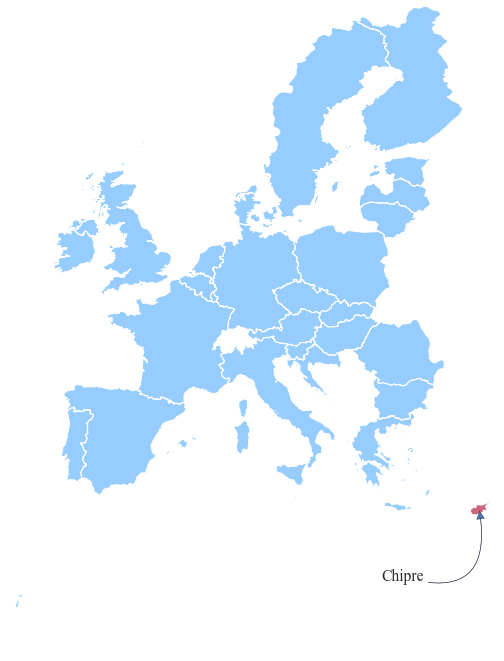

In [50]:
fs = 7
fs = (fs, fs*1.3)
fig, ax = plt.subplots(1, figsize=fs)
geodf.plot(linewidth=1., color="#2E9AFE", edgecolor='white', ax=ax)
geodf[geodf.CNTR_ID == "CY"].plot(
    linewidth=.1, color="red", edgecolor='white', ax=ax)
ax = plt.gca()
plt.xlim(-15, 35)
plt.ylim(25, 70)

ax.annotate(
    "Chipre",
    xy=(cy.x, cy.y),
    xycoords='data',
    size=15,
    xytext=np.array([cy.x - 5, cy.y]) - 5,
    arrowprops=dict(
        arrowstyle="simple,tail_width=0.02", connectionstyle="arc3,rad=0.8"))

sns.despine(bottom=True, left=True)

plt.tick_params(
    axis='both',
    which='both',
    bottom='off',
    top='off',
    labelbottom='off',
    right='off',
    left='off',
    labelleft='off')
plt.tight_layout()
plt.savefig("../imgs/mapa.eps", bbox_iches="tight", dpi=1800)
plt.show()

*Fuente: Eurostat; Elaboración propia*

## HISTORIA

Chipre tiene una riqueza histórica que comienza en la prehistoria, desde pozos de agua mas antiguos del mundo[cita], hasta poblados del neolítico[cita]. Chipre ha albergado a diversas cultaras, cómo la Griega y la fenicia (Antigua región orginalmente que en la actualidad iba desde Israel hasta Siria), pasando por Egipcios, persas, el imperio romano, Bizantino (actual Turquía), Árabe, Rep. de Venecia, Turco-Otomana, británica y griega otra vez. En 1974 se produce un golpe de estado por el gobierno Turco, invadiendo el tercio norte de Chipre, y dando origen a la Rep. Turca del Norte de Chipre (RTNC) que es un estado que sólo reconoce Turquía. En 2004 Chipre entra en la Unión Europea.

Chipre se divide en seis distritos:

- Nicosia: Se encuentra en la RTNC
- Famagusta: Se encuentra en la RTNC
- Limassol
- Pafos
- Lárnaca
- Kyrenia: Se encuentra en la RTNC
 
 Además, en el sur existen dos territorios que son bases militares bajo el mando de Reino Unido.
 
 - Acrotiri
 - Dhekelia
 
 ![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Cyprus_districts.svg/640px-Cyprus_districts.svg.png)
 
 Fuente: ChipreWi33

## RECURSOS NATURALES

Recursos Naturales de Chipre:

- cobre
- pirita
- asbesto
- yeso
- madera
- sal
- mármol
- tierra de arcilla.
- gas natural
- petróleo\* 

\*Actualmente se encuentra en fase de exploración y análisis para su futura explotación que se estima a partir 2018-2020.

Fuente: ICEXEspa50

## GRUPOS ECONÓMICOS

## INSTITUCIONES INTERNACIONALES

## RASGOS ECONÓMICOS

## SECTORES RELEVANTES EN LA PRODUCCIÓN Y COMERCIO EXTERIOR

## EVOLUCIÓN MACROECONÓMICA COMPARADA

## RELACIÓN REAL DE INTERCAMBIO

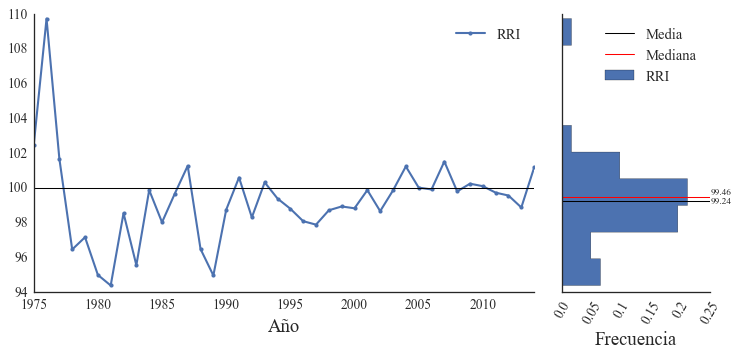

In [51]:
# RRI

indices = [0,1,3,4]
rri = wdi_chipre.iloc[:,indices].copy()
rri.dropna(inplace=1)
rri.tail()

xreal, x = rri.iloc[:,0], rri.iloc[:,1]
mreal, m = rri.iloc[:,2], rri.iloc[:,3]

rri["ivux"] = x / xreal
rri["ivum"] = m / mreal
rri["RRI"] = rri.ivux / rri.ivum * 100
rri.fillna(value=0)
rri.head()

# print(rri.to_csv(decimal=","))

gs = gridspec.GridSpec(4, 4)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1 = plt.subplot(gs[:, :-1])
ax2 = plt.subplot(gs[:, -1], sharey=ax1)

dw = rri.RRI

dw.plot(ax=ax1, marker=".")
dw.plot(kind="hist", ax=ax2, orientation='horizontal', normed=1, histtype="stepfilled")
sns.despine()

ax1.tick_params(labelsize=13)
ax2.tick_params(labelsize=13)

ax1.set_xlabel(u"Año")
ax2.set_xlabel(u"Frecuencia")
labs = list(ax2.get_xticks())
ax2.set_xticklabels(labs, rotation=60)
ax1.legend(loc=0)

plt.tight_layout()

ax1.axhline(100, color="k", linewidth=1)

ax2.axhline(dw.mean(), color="k", linewidth=1, label="Media")
ax2.axhline(dw.median(), color="r", linewidth=1, label="Mediana")

xtxt = 0.25
ax2.text(x=xtxt, y=dw.mean() - 0.15, s="%s" % round(dw.mean(), 2), fontsize=9)
ax2.text(
    x=xtxt, y=dw.median() + 0.15, s="%s" % round(dw.median(), 2), fontsize=9)

ax2.legend(loc=0)

plt.tight_layout()

plt.savefig("../imgs/rri_0.eps", bbox_iches="tight", dpi=1800)
#plt.ylim(0,111)
plt.show()

## POLÍTICAS ECONÓMICAS

# EVOLUCIÓN DEL COMERCIO Y SUS DETERMINANTES MACROECONÓMICOS

## INDICADORES

BALANZA COMERCIAL

\begin{equation}
X - M
\end{equation}

TASA DE COBERTURA

\begin{equation}
\frac{X}{M}100
\end{equation}

PENETRACIÓN DE LAS IMPORTACIONES

\begin{equation}
\frac{M}{\text{PIB} + M - X} 100
\end{equation}

GRADO DE APERTURA

\begin{equation}
\frac{X+M}{\text{PIB}} 100
\end{equation}

PROPENSIÓN EXPORTADORA

\begin{equation}
\frac{X}{\text{PIB}} 100
\end{equation}

## EVOLUCIÓN DEL COMERCIO

In [26]:
cuadro = DataFrame()

pib = wdi_chipre.iloc[:, 6]
m = wdi_chipre.iloc[:, 4]
x = wdi_chipre.iloc[:, 1]
mreal = wdi_chipre.iloc[:, 3]
xreal = wdi_chipre.iloc[:, 0]

# comprobamos que las variables coinciden
for v in "pib m x mreal xreal".split():
    print(v, globals()[v].name, sep="\t");

cuadro["Importaciones de BBSS (moneda local)"] = m
cuadro["Exportaciones de BBSS (moneda local)"] = x
cuadro["Crecimiento nominal de las importaciones (%)"] = m.pct_change() * 100
cuadro["Crecimiento nominal de las exportaciones (%)"] = x.pct_change() * 100
cuadro["Crecimiento real de las importaciones (%)"] = mreal.pct_change() * 100
cuadro["Crecimiento real de las exportaciones (%)"] = xreal.pct_change() * 100
cuadro["Saldo comercial (LCU)"] = x - m
cuadro["Saldo Comercial (% PIB)"] = (x - m) / pib * 100
cuadro["Tasa de Cobertura (%)"] = x / m * 100
cuadro["Tasa de Apertura (%)"] = (x + m) / pib * 100
cuadro["Penetración de las Importaciones (%)"] = m / (pib + m - x) * 100
cuadro["Propensión Exportadora"] = x / pib * 100

pib	PIB (corriente LCU)
m	Importaciones de bienes y servicios (corriente LCU)
x	Exportaciones de bienes y servicios (corriente LCU)
mreal	Importaciones de bienes y servicios (constante LCU)
xreal	Exportaciones de bienes y servicios (constante LCU)


### NOMINAL

#### CUADRO

Valor de los últimos 10 años de las variables.

In [74]:
cuadro.dropna(how="all", inplace=True)
cuadro.iloc[-15:,:].applymap(notacion_esp).to_clipboard()

*Fuente: World Bank API; Elaboración propia*

#### CUADRO

Evolución del crecimiento nominal de las importaciones y exportaciones de los últimos 15 años con los datos disponibles.

#### CUADRO

blabla

In [76]:
dw = cuadro.iloc[:, indices].copy().dropna()
dw.tail(15).applymap(notacion_esp).to_clipboard()
dw.tail(15)


,Importaciones de BBSS (moneda local),Exportaciones de BBSS (moneda local),Crecimiento nominal de las exportaciones (%),Crecimiento real de las importaciones (%)
date,,,,
2000,"7.155.010.000,00","7.412.550.000,00","13,81","9,21"
2001,"7.265.740.000,00","7.787.330.000,00","5,06","-0,19"
2002,"7.273.030.000,00","7.411.900.000,00","-4,82","-0,36"
2003,"7.224.510.000,00","7.419.710.000,00","0,11","-0,97"
2004,"7.900.090.000,00","7.882.900.000,00","6,24","6,95"
2005,"8.333.840.000,00","8.254.850.000,00","4,72","1,57"
2006,"9.019.310.000,00","8.549.730.000,00","3,57","5,70"
2007,"10.159.530.000,00","9.326.470.000,00","9,08","10,46"
2008,"11.440.420.000,00","9.417.380.000,00","0,97","7,74"


*Fuente: World Bank API; Elaboración propia*

##### FIGURA

Análisis de la evolución de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

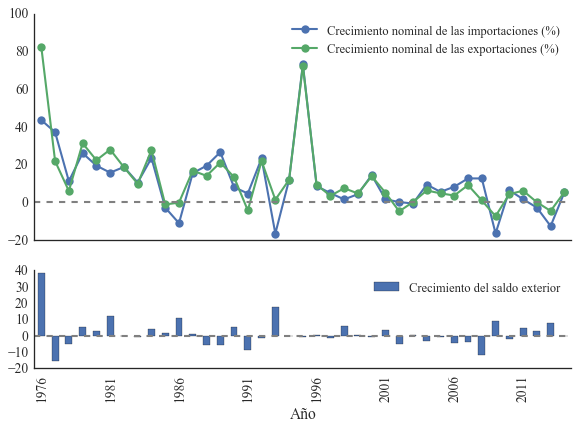

In [78]:
gs = plt.GridSpec(3, 1)
gs1 = gs[:2, 0]
gs2 = gs[-1, 0]
indices = [2, 3]
dw = cuadro.iloc[:, indices].copy().dropna()
dw.index = [str(i) for i in dw.index]

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(gs1)
ax2 = plt.subplot(gs2, sharex=ax1)
axs = [ax1, ax2]

dw.plot(ax=ax1, marker="o")
dw["Crecimiento del saldo exterior"] = dw.iloc[:, 1] - dw.iloc[:, 0]

dw.iloc[:, 2].plot(ax=ax2, kind="bar")

for ax in axs:
    ax.axhline(0, color="grey", linestyle="--")
    ax.tick_params(labelsize=13)
    ax.set_xlabel(u"Año", fontsize=15)
    ax.legend(loc=0, fontsize=12)
    ax.set_xticklabels(
        [str(i) if i in dw.index[::5] else "" for i in dw.index])

sns.despine()
plt.tight_layout()
plt.savefig("../imgs/ev_nominal.pdf", bbox_iches="tight", dpi=1800)

plt.show()

*Fuente: World Bank API; elaboración propia*

Tanto las importaciones cómo las exportaciones se han visto afectadas nominalmente en 2008 por la crisis económica, se puede ver en la caída de éstas en el gráfico. En los últimos 10 años, el crecimiento de ambas variables ha estado girando en torno al 2% siendo las exportaciones ligeramente superior a las importaciones haciendo que el crecimiento del saldo exterior sea positivo pero muy discreto de magnitud de un 0.2%. Es interesante que ver que sólo el 20% de los años el crecimiento de las exportaciones presentó valores negativos (30% para las importaciones) esto se debe principalmente, cómo veremos en el siguiente gráfico, a la inflación.

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

/Users/mmngreco/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


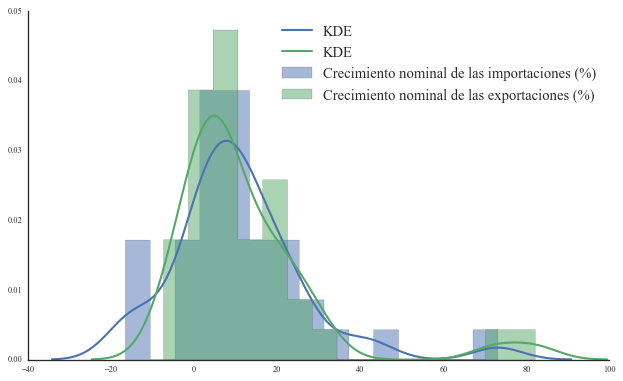

In [28]:
c1, c2 = "#4C72B0 #55A868".split()
plt.hist(dw.iloc[:,0], normed=True, alpha=0.5, bins=15, histtype="stepfilled", label=dw.iloc[:,0].name, color=c1)
plt.hist(dw.iloc[:,1], normed=True, alpha=0.5, bins=15, histtype="stepfilled", label=dw.iloc[:,1].name, color=c2)

sns.kdeplot(dw.iloc[:,0], color=c1, label="KDE")
sns.kdeplot(dw.iloc[:,1], color=c2, label="KDE")

sns.despine()

plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))

plt.legend()
sns.despine()

*Fuente: World Bank API; elaboración propia*

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

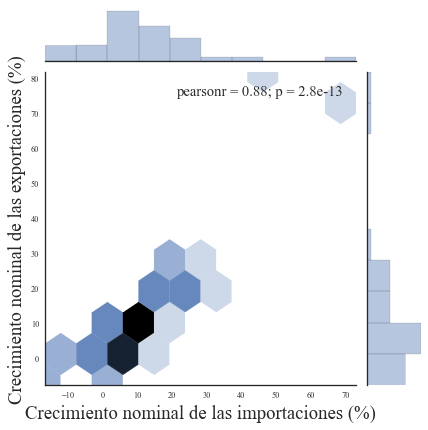

In [29]:
sns.jointplot(dw.iloc[:,0], dw.iloc[:,1], kind="hex");

*Fuente: World Bank API; elaboración propia*

### REAL

#### CUADRO

blabla

In [30]:
dw.tail(15)

,Crecimiento nominal de las importaciones (%),Crecimiento nominal de las exportaciones (%),Crecimiento del saldo exterior
2000,"14,38","13,81","-0,56"
2001,"1,55","5,06","3,51"
2002,"0,10","-4,82","-4,92"
2003,"-0,67","0,11","0,77"
2004,"9,35","6,24","-3,11"
2005,"5,49","4,72","-0,77"
2006,"8,23","3,57","-4,65"
2007,"12,64","9,08","-3,56"
2008,"12,61","0,97","-11,63"
2009,"-16,52","-7,39","9,13"


*Fuente: World Bank API; elaboración propia*

#### CUADRO

blabla

In [31]:
np.round(dw.iloc[-10:,:].describe(), 2)

,Crecimiento nominal de las importaciones (%),Crecimiento nominal de las exportaciones (%),Crecimiento del saldo exterior
count,"10,00","10,00","10,00"
mean,"2,02","2,22","0,20"
std,"9,93","5,05","6,25"
min,"-16,52","-7,39","-11,63"
25%,"-1,72","0,25","-3,19"
50%,"5,37","3,93","-0,33"
75%,"7,76","5,20","4,11"
max,"12,64","9,08","9,13"


*Fuente: World Bank API; elaboración propia*

In [32]:
# coefciente de variación
_.iloc[2,:] / _.iloc[1,:];

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

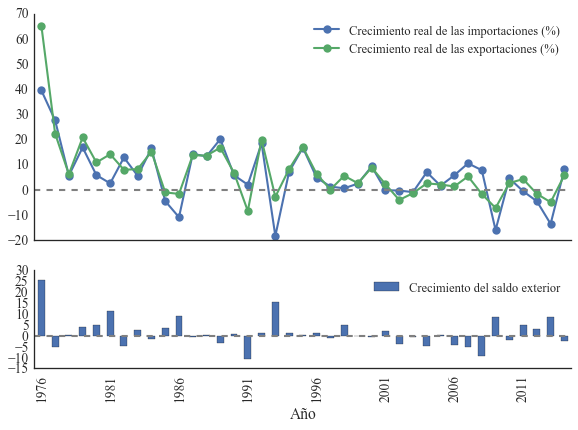

In [77]:
gs = plt.GridSpec(3, 1)
gs1 = gs[:2, 0]
gs2 = gs[-1, 0]
indices = [4, 5]
dw = cuadro.iloc[:, indices].copy().dropna()
dw.index = [str(i) for i in dw.index]

fig = plt.figure(figsize=(8, 6))
ax1 = plt.subplot(gs1)
ax2 = plt.subplot(gs2, sharex=ax1)
axs = [ax1, ax2]

dw.plot(ax=ax1, marker="o")
dw["Crecimiento del saldo exterior"] = dw.iloc[:, 1] - dw.iloc[:, 0]

dw.iloc[:, 2].plot(ax=ax2, kind="bar")

for ax in axs:
    ax.axhline(0, color="grey", linestyle="--")
    ax.tick_params(labelsize=13)
    ax.set_xlabel(u"Año", fontsize=15)
    ax.legend(loc=0, fontsize=12)
    ax.set_xticklabels(
        [str(i) if i in dw.index[::5] else "" for i in dw.index])

sns.despine()
plt.tight_layout()
plt.savefig("../imgs/ev_real.pdf", bbox_iches="tight", dpi=1800)

plt.show()

*Fuente: World Bank API; elaboración propia*

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

/Users/mmngreco/anaconda3/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


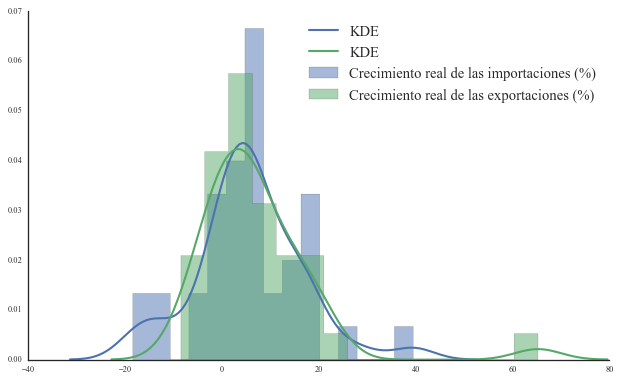

In [34]:
c1, c2 = "#4C72B0 #55A868".split()
plt.hist(dw.iloc[:,0], normed=True, alpha=0.5, bins=15, histtype="stepfilled", label=dw.iloc[:,0].name, color=c1)
plt.hist(dw.iloc[:,1], normed=True, alpha=0.5, bins=15, histtype="stepfilled", label=dw.iloc[:,1].name, color=c2)

sns.kdeplot(dw.iloc[:,0], color=c1, label="KDE")
sns.kdeplot(dw.iloc[:,1], color=c2, label="KDE")

sns.despine()

plt.legend(loc="upper right", bbox_to_anchor=(1.2,1))

plt.legend()
sns.despine()

*Fuente: World Bank API; elaboración propia*

#### CUADRO

blabla

In [35]:
pd.crosstab((dw.iloc[:,0]>0) * 1, (dw.iloc[:,1] > 0) * 1, margins=True)

Crecimiento real de las exportaciones (%),0,1,All
Crecimiento real de las importaciones (%),,,
0,8,2,10
1,2,27,29
All,10,29,39


*Fuente: World Bank API; elaboración propia*

El crecimiento real de las exportaciones y de las importaciones, para el período comprendido entre 2005 y 2014, se ha mantenido entorno al 0.55% y 0.32% respectivamente, unos niveles muy bajos, que coinciden con la crisis económica de 2008, a partir de dicha fecha el crecimiento de las exportaciones caen y no acaban de tener un crecimiento sostenido, el caso de las importaciones es símilar pero con unas caídas más pronunciadas, lo que ha hecho que el crecimiento del saldo exterior se mantenga en valores cercanos al 0.23% de media.

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

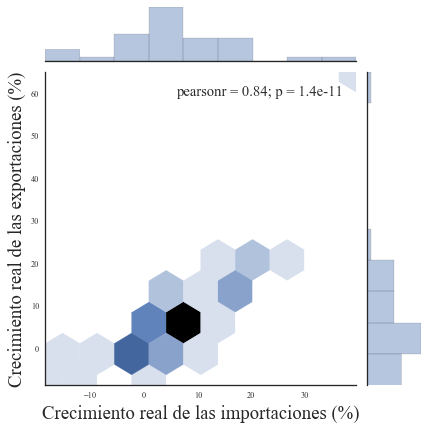

In [36]:
sns.jointplot(dw.iloc[:,0], dw.iloc[:,1], kind="hex");

*Fuente: World Bank API; elaboración propia*

## DETERMINANTES MACROECONÓMICOS:

- evolución del PIB
- Precios relativos
- Tipo de cambio

# DISTRIBUCIÓN GEOGRÁFICA DE M Y X

In [37]:
# calculamos los pesos
Mgeo["peso2007"] = Mgeo.m2007 / Mgeo.m2007.sum() * 100
Mgeo["peso2011"] = Mgeo.m2011 / Mgeo.m2011.sum() * 100

Xgeo["peso2007"] = Xgeo.x2007 / Xgeo.x2007.sum() * 100
Xgeo["peso2011"] = Xgeo.x2011 / Xgeo.x2011.sum() * 100

# comprobamos
Mgeo.head()

# ordenamos por pesos
Mgeo.sort_values("peso2007 peso2011".split(), ascending=False, inplace=True)
Xgeo.sort_values("peso2007 peso2011".split(), ascending=False, inplace=True)

# nos quemos con los mas representativos
Xgeo.iloc[5,:] = Xgeo.iloc[5:,:].sum()
Xgeo = Xgeo.iloc[:6,:]
Xgeo.iloc[-1,0] = "RESTO"

Mgeo.iloc[5,:] = Mgeo.loc[5:,:].sum()
Mgeo = Mgeo.iloc[:6,:]
Mgeo.iloc[-1,0] = "RESTO"

In [38]:
# traducimos los nombres
Mgeo.iloc[:-1,0] = Mgeo.iloc[:-1,0].apply(translator.translate)
Xgeo.iloc[:-1,0] = Xgeo.iloc[:-1,0].apply(translator.translate)

In [161]:
Mgeo.to_csv("../data/Mgeo.csv", index=False)
Xgeo.to_csv("../data/Xgeo.csv", index=False)

In [29]:
Mgeo = pd.read_csv("../data/Mgeo.csv")
Xgeo = pd.read_csv("../data/Xgeo.csv")

#### CUADRO

Destino de las importaciones de Chipre, volúmen y peso para los años 2007 y 2011.

In [30]:
Mgeo

,pais,m2007,m2011,peso2007,peso2011
0,GRECIA,1530,1862,"17,49","21,38"
1,ITALIA,884,709,"10,11","8,14"
2,REINO UNIDO,849,768,"9,71","8,82"
3,ALEMANIA,811,707,"9,27","8,12"
4,ISRAEL,563,888,"6,44","10,20"
5,RESTO,4672,4663,"53,42","53,54"


*Fuente: PC-TAS; elaboración propia*

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

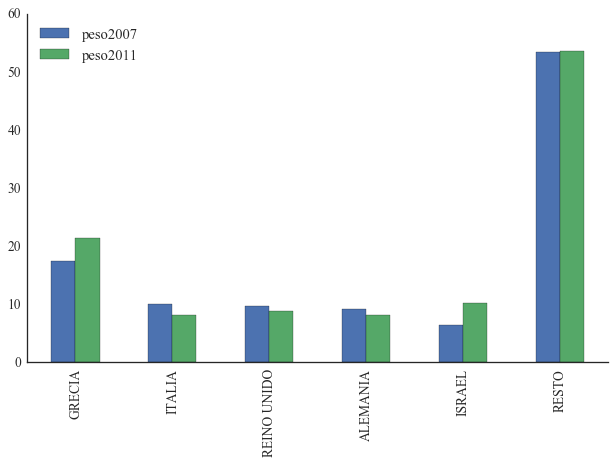

In [82]:
# graficos
ax = Mgeo.iloc[:,-2:].plot(kind="bar")
ax.set_xticklabels(Mgeo.pais.tolist())
sns.despine()
ax.tick_params(labelsize=13)
plt.savefig("../imgs/bar_mgeo.pdf", bbox_iches="tight", dpi=100)
plt.show()

*Fuente: PC-TAS; elaboración propia*

Los principales orígenes de las importaciones de Chipre son países de la propia unión europea como muestra la Figura##, pero destaca sobre el resto las importaciones procedentes de Grecia con casi el doble de peso sobre el esto, diferencia que se ha mantenido desde 2007 hasta 2011.

Estas relaciones se pueden explicar con el pasado geopolítico de Chipre, que pasó a estar a menos de UK, luego Grecia y con una cultura...

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

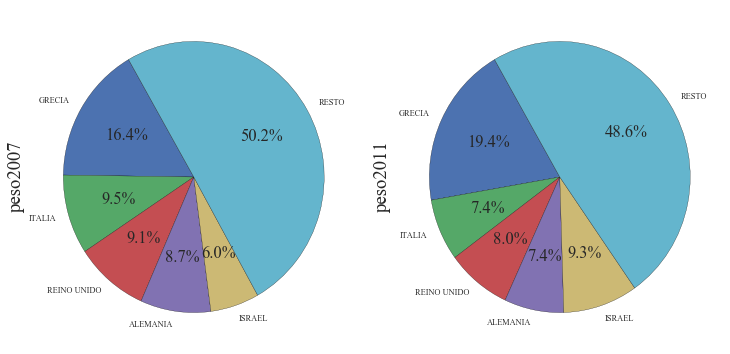

In [84]:
ax1, ax2 = Mgeo.iloc[:,-2:].plot(kind="pie", 
                                 subplots=True, 
                                 figsize=(10,5), 
                                 labels=Mgeo.pais.tolist(),
                                 legend=False,
                                 autopct='%1.1f%%',
                                 startangle=120)
ax.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("../imgs/pie_mgeo.pdf", bbox_iches="tight", dpi=100)
plt.show()

*Fuente: PC-TAS; elaboración propia*

#### CUADRO

Destino de las exportaciones de Chipre 2007 y 2011 por importancia. Dado que la importancia se concentra excesivamente en poco países se ha seleccionado aquellos destinos cuyos pesos alcanzan el 50% del total.

In [41]:
Xgeo

,pais,x2007,x2011,peso2007,peso2011
0,GRECIA,295,465,"19,95","23,83"
1,PARA BUQUES,233,356,"15,75","18,25"
2,REINO UNIDO,206,174,"13,93","8,92"
3,ALEMANIA,91,94,"6,15","4,82"
4,RUMANÍA,43,19,"2,91","0,97"
5,RESTO,611,843,"41,31","43,21"


*Fuente: PC-TAS; elaboración propia*

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

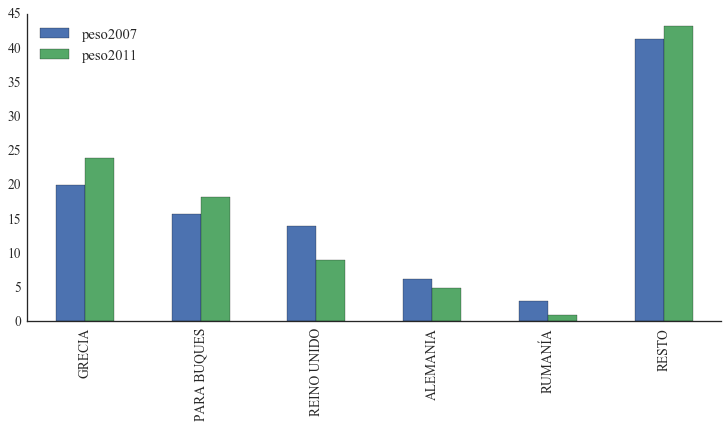

In [85]:
ax = Xgeo.iloc[:,-2:].plot(kind="bar")
ax.set_xticklabels(Xgeo.pais.tolist())
sns.despine()
ax.tick_params(labelsize=13)
plt.tight_layout()
plt.savefig("../imgs/bar_xgeo.pdf", bbox_iches="tight", dpi=100)
plt.show()

*Fuente: PC-TAS; elaboración propia*

Las exportaciones de Chipre tienen como principales destinos, Grecia, Para Buques, Reino Unido, Alemania y Rumanía, que juntas tiene un peso de {{sum(Xgeo.peso2007.values[:-1])}}% en 2007 y {{sum(Xgeo.peso2011.values[:-1])}}% en 2011. Cómo puede verse en la Figura##, las exportaciones de 2007 hacia Grecia y Para Buques aumentaron en 2011, mientras que el resto disminuyeron.

Los destinos concuerdan con la historia Chipriota, fué una colonia y de Reino Unido, y formó parte de Grecia, esta dependencia del pasado ha hecho que se mantenga hasta hoy en día nexos comerciales fuertes.

##### FIGURA

Frecuencias de crecimiento positivo vs negativo de las importaciones y exportaciones nominales, usando el crecimiento interanual de ambas variables.

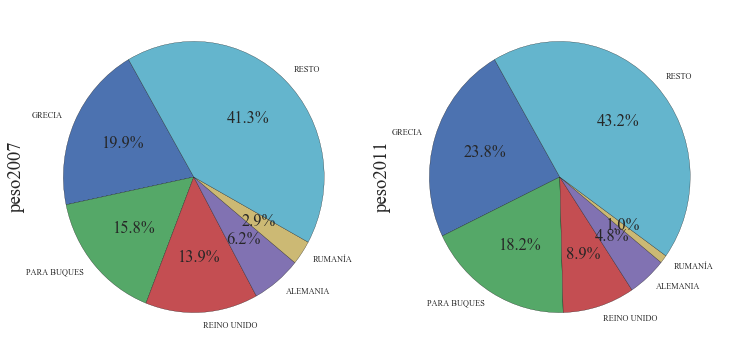

In [86]:
ax1, ax2 = Xgeo.iloc[:,-2:].plot(kind="pie", 
                                 subplots=True, 
                                 figsize=(10,5), 
                                 labels=Xgeo.pais.tolist(),
                                 legend=False,
                                 autopct='%1.1f%%',
                                 startangle=120)
[ax.tick_params(labelsize=13) for ax in [ax1, ax2]]
plt.tight_layout()
plt.savefig("../imgs/pie_xgeo.pdf", bbox_iches="tight", dpi=100)
plt.show()

*Fuente: PC-TAS; elaboración propia*

# COMPETITIVIDAD PRECIO O COSTE

- Indices de tipo de cambio efectivo real
- Tipo de cambio oficial
- Tasa de inflación

# COMPETITIVIDAD ESTRUCTURAL

# ESPECIALIZACIÓN COMERCIAL

## INDICE DE DEPENDENCIA

Para todo país $h$ y el sector $i$

\begin{equation}
IDep^h_i = \frac{\frac{M^h_i}{\sum_i M^h_i}}{\frac{\sum_h M^h_i}{\sum_h \sum_i M^h_i}} 100
\end{equation}

## INDICE DE ESPECIALIZACIÓN

\begin{equation}
IEsp^h_i = \frac{\frac{X^h_i}{\sum_i X^h_i}}{\frac{\sum_h X^h_i}{\sum_h \sum_i X^h_i}} 100
\end{equation}

## SALDO COMERCIAL RELATIVO

\begin{equation}
SCR_i = \frac{X_i - M_i}{X_i + M_i} 100
\end{equation}

### IMPORTANCIA RELATIVA DEL SECTOR EN LAS IMPORTACIONES Y EXPORTACIONES.

\begin{equation}
IRX_i = \frac{X_i}{\sum_i X_i} 
\end{equation}

\begin{equation}
IRM_i = \frac{M_i}{\sum_i M_i}
\end{equation}

In [36]:
data.head()

,code,xchipre11,mchipre11,xue11,mue11
0,1,"1,00","2,00","12.499,00","9.761,00"
1,2,"14,00","65,00","55.064,00","47.434,00"
2,3,"28,00","60,00","21.887,00","37.904,00"
3,4,"82,00","90,00","53.020,00","42.436,00"
4,5,"2,00","2,00","3.423,00","4.114,00"


In [37]:
res = DataFrame()
tot = data.sum()


res["idep"] = (data.mchipre11 / tot.mchipre11) / (data.mue11 / tot.mue11) * 100

res["iesp"] = (data.xchipre11 / tot.xchipre11) / (data.xue11 / tot.xue11) * 100

res["scr"] = (data.xchipre11 - data.mchipre11)/(data.xchipre11 + data.mchipre11) * 100

res["irx"] = data.xchipre11 / tot.xchipre11 * 100
res["irm"] = data.mchipre11 / tot.mchipre11 * 100
res.index = data.code
a = data.xchipre11 + data.mchipre11
b = np.abs(data.xchipre11 - data.mchipre11)

res["igl"] = (a - b) / a * 100
res.fillna(value=0, inplace=True)

res.head()

,idep,iesp,scr,irx,irm,igl
code,,,,,,
1,"14,18","24,10","-33,33","0,05","0,02","0,00"
2,"94,82","76,57","-64,56","0,72","0,75","0,00"
3,"109,54","385,29","-36,36","1,43","0,69","0,00"
4,"146,76","465,79","-4,65","4,19","1,03","0,00"
5,"33,64","175,97","0,00","0,10","0,02","0,00"


## PRESENTACIÓN DE LOS DATOS:

Para los sectores reelevantes que cumplen cnd1 & cnd2:

|         | I.DEP > 100     | I.ESP > 100   |
|:--------|:---------------:|:-------------:|
| SCR > 0 | c1 = cnd3 & cnd4     | c2 = cnd3 & cnd5   |
| SCR < 0 | c3 = cnd3 - 1 & cnd4 | c4 = cnd3-1 & cnd5 |


In [38]:
# condiciones para seleccionar los sectores mas importantes
cnd1 = (res.irx > 1.45)
cnd2 = (res.irm > 1.45)

# condiciones de los cuadrantes
cnd3 = (res.scr > 0)
cnd4 = (res.idep > 100)
cnd5 = (res.iesp > 100)

### CUADRANTES

In [39]:
c1 = res[(cnd1 | cnd2) & cnd3 & cnd4]
c1

,idep,iesp,scr,irx,irm,igl
code,,,,,,


In [40]:
c2 = res[(cnd1 | cnd2) & cnd3 & cnd5]
c2

,idep,iesp,scr,irx,irm,igl
code,,,,,,
7,"92,44","1.061,90","40,98","4,40","0,41","0,00"
29,"30,67","309,79","36,25","8,74","0,92","0,00"
71,"31,18","141,60","7,07","2,71","0,53","0,00"
74,"22,60","287,38","49,33","2,86","0,22","0,00"


In [41]:
c3 = res[(cnd1 | cnd2) & cnd3-1 & cnd4]
c3

,idep,iesp,scr,irx,irm,igl
code,,,,,,
4,"146,76","465,79","-4,65","4,19","1,03","0,00"
8,"100,05","410,83","-23,23","1,94","0,70","0,00"
10,"486,01","0,00","-100,00","0,00","1,93","0,00"
20,"148,51","344,54","-31,82","1,53","0,67","0,00"
22,"261,89","58,27","-85,23","0,66","1,87","0,00"
24,"471,69","1.009,57","-32,35","3,53","1,55","0,00"
27,"157,01","263,79","-72,73","17,79","25,28","0,00"
33,"254,63","29,80","-92,11","0,31","1,67","0,00"
48,"125,75","19,91","-91,52","0,36","1,81","0,00"


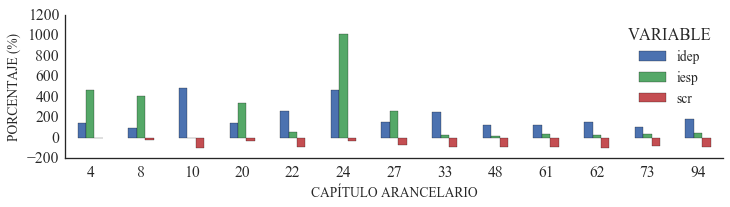

In [42]:
c3.loc[:,"idep":"scr"].plot(kind="bar", figsize=(10,3))

sns.despine()
ax = plt.gca()

plt.xlabel("CAPÍTULO ARANCELARIO", fontsize=13)
plt.ylabel("PORCENTAJE (%)", fontsize=13)

ax.tick_params(labelsize=15)
ax.set_xticklabels(c3.index, rotation = 0)

plt.legend(loc="upper right", title="VARIABLE", fontsize=13)

plt.tight_layout()

In [43]:
c4 = res[(cnd1 | cnd2) & cnd3-1 & cnd5]
c4

,idep,iesp,scr,irx,irm,igl
code,,,,,,
4,"146,76","465,79","-4,65","4,19","1,03","0,00"
8,"100,05","410,83","-23,23","1,94","0,70","0,00"
20,"148,51","344,54","-31,82","1,53","0,67","0,00"
24,"471,69","1.009,57","-32,35","3,53","1,55","0,00"
27,"157,01","263,79","-72,73","17,79","25,28","0,00"
30,"88,85","277,71","-3,60","14,37","3,46","0,00"
90,"67,61","102,81","-40,37","3,32","1,75","0,00"


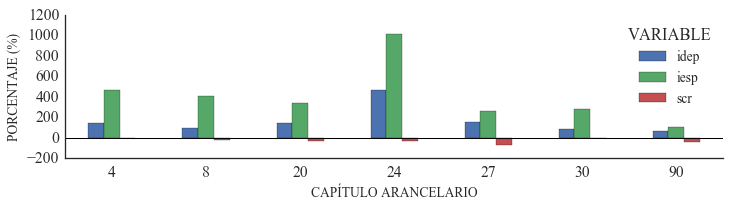

In [44]:
c4.loc[:, "idep":"scr"].plot(kind="bar", figsize=(10, 3))

sns.despine()
ax = plt.gca()

plt.xlabel("CAPÍTULO ARANCELARIO", fontsize=13)
plt.ylabel("PORCENTAJE (%)", fontsize=13)

ax.tick_params(labelsize=15)
ax.set_xticklabels(c4.index, rotation=0)
ax.axhline(0, color="k", linewidth=1)
plt.legend(loc="upper right", title="VARIABLE", fontsize=13)

plt.tight_layout()

La tabla con los cuadrantes bien definidos nos queda de la siguiente forma:


|       | I.DEP > 100|I.ESP > 100 |
|:------|:----------:|:----------:|
|SCR > 0|{{c1.iloc[:,:4]}}|{{c2.iloc[:,:4]}}|
|SCR < 0|{{c3.iloc[:,:4]}}|{{c4.iloc[:,:4]}}|


El cuadrante 1: No tenemos ningun producto que cumpla las condiciones en dicho cuadrante, lo que implica que...


/Users/mmngreco/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


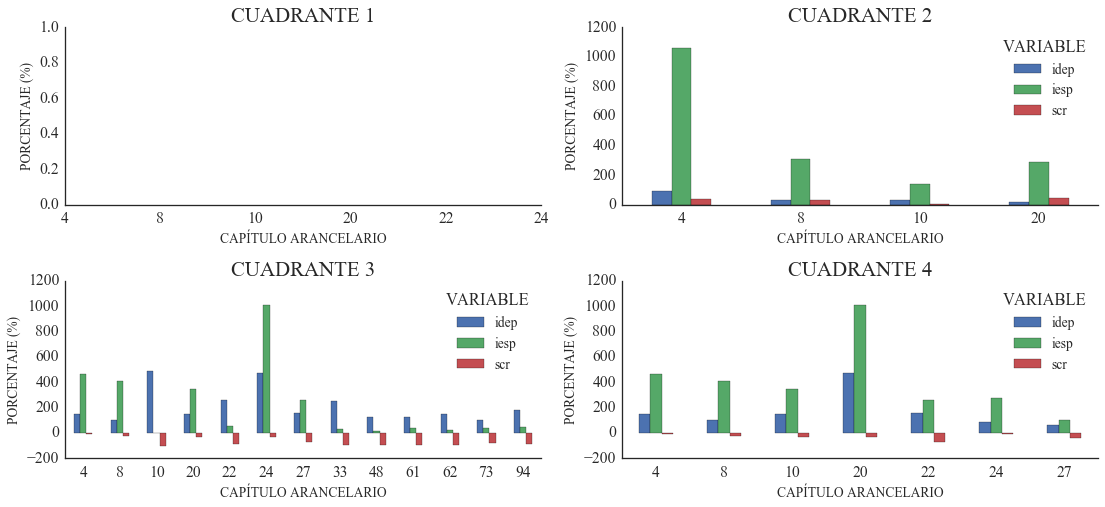

In [109]:
fig, axs = plt.subplots(2,2, figsize=(15,7))

c2.loc[:,"idep":"scr"].plot(kind="bar", ax=axs[0][1])
c3.loc[:,"idep":"scr"].plot(kind="bar", ax=axs[1][0])
c4.loc[:,"idep":"scr"].plot(kind="bar", ax=axs[1][1])

for i, ax in enumerate(axs.flatten()):
    ax.set_title("CUADRANTE %s" % (i+1))
    ax.set_xlabel("CAPÍTULO ARANCELARIO", fontsize=13)
    ax.set_ylabel("PORCENTAJE (%)", fontsize=13)
    ax.tick_params(labelsize=15)
    ax.set_xticklabels(c3.index, rotation = 0)
    ax.legend(loc="upper right", title="VARIABLE", fontsize=13)

sns.despine()
plt.tight_layout()
plt.savefig("../imgs/cuadrantes.pdf", bbox_iches="tight", dpi=100)

/Users/mmngreco/anaconda3/lib/python3.5/site-packages/matplotlib/axes/_axes.py:531: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


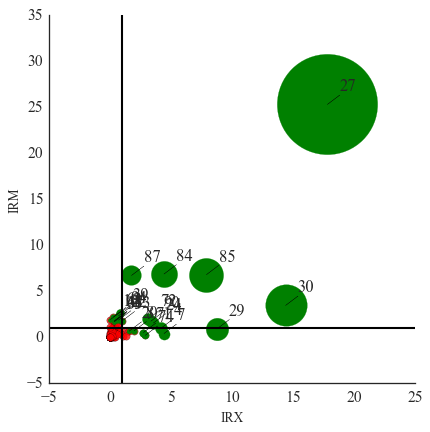

In [45]:
dplot = res.copy()
fig, ax = plt.subplots(1, figsize=(6, 6))

dplot.plot(
    kind="scatter", x="irx", y="irm", ax=ax, color="red", s=50, alpha=0.8)

for i in dplot.loc[cnd1 | cnd2, ].index:
    s = dplot.loc[i, ["irx", "irm"]].sum() / 2
    x = dplot.loc[i, "irx"]
    y = dplot.loc[i, "irm"]
    dx = 1
    dy = 1.5
    ax.scatter(x=x, y=y, color="green", s=20 * s**2)
    plt.text(x + dx, y + dy, i)
    plt.arrow(
        x,
        y,
        1,
        1, )

plt.axvline(1, color="k")
plt.axhline(1, color="k")

sns.despine()

plt.xlabel("IRX", fontsize=13)
plt.ylabel("IRM", fontsize=13)

ax.tick_params(labelsize=15)
plt.legend(loc="upper right", title="VARIABLE", fontsize=13)

plt.tight_layout()

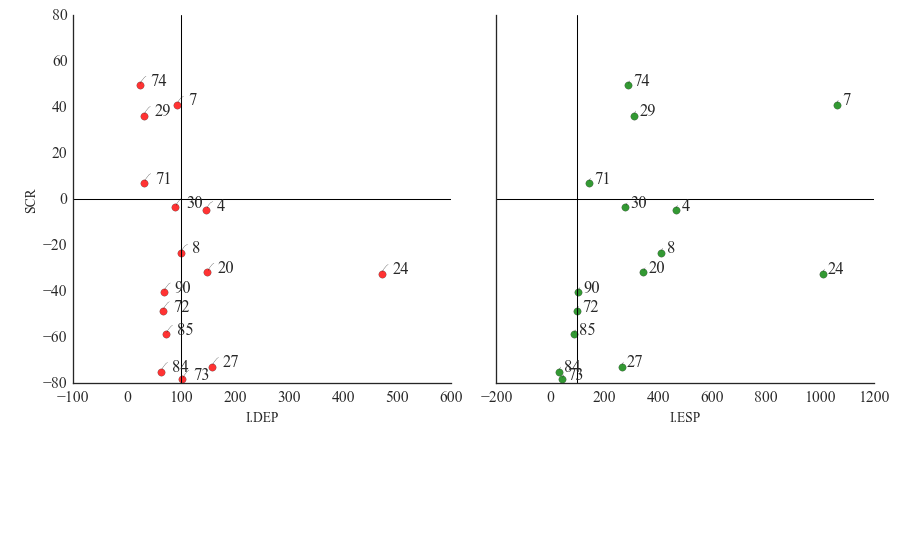

In [108]:
dplot = res.loc[(cnd1 | cnd2), :].copy()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6), sharey=True)

dplot.plot(
    kind="scatter", x="idep", y="scr", ax=ax1, color="red", s=50, alpha=0.8)

dplot.plot(
    kind="scatter", x="iesp", y="scr", ax=ax2, color="green", s=50, alpha=0.8)

for i in dplot.index:
    s = i
    x1 = dplot.loc[i, "idep"]
    x2 = dplot.loc[i, "iesp"]
    y = dplot.loc[i, "scr"]
    d = 20
    ax1.annotate(
        s,
        xy=(x1, y),
        xytext=((x1 + d, y)),
        arrowprops=dict(
            arrowstyle="-", connectionstyle="arc3,rad=0.8"))
    ax2.annotate(
        s,
        xy=(x2, y),
        xytext=((x2 + d, y)),
        arrowprops=dict(
            arrowstyle="-", connectionstyle="arc3,rad=0.8"))

ax1.axvline(100, color="k", linewidth=1)
ax2.axvline(100, color="k", linewidth=1)
ax1.axhline(0, color="k", linewidth=1)
ax2.axhline(0, color="k", linewidth=1)

sns.despine()

ax1.set_xlabel("I.DEP", fontsize=13)
ax2.set_xlabel("I.ESP", fontsize=13)
ax1.set_ylabel("SCR", fontsize=13)

ax1.tick_params(labelsize=15)
ax2.tick_params(labelsize=15)

#plt.legend(loc="upper right", title="VARIABLE", fontsize=13)
plt.ylim(-80, 80)
plt.tight_layout()
plt.savefig("../imgs/cuadrantes2.pdf", bbox_iches="tight", dpi=1800)
plt.show()

# <span class="burk">COMERCIO INTRAINDUSTRIAL</span>

\begin{equation}
IGL_i = \frac{X_i + M_i - |X_i - M_i|}{X_i + M_i}100
\end{equation}


\begin{equation}
IGL_{agg} = \frac{\sum_i(X_i + M_i) - \sum_i |X_i - M_i|}{\sum_i (X_i + M_i)} \cdot 100
\end{equation}


#### CUADRO



In [46]:
res.sort_values(by="igl", ascending=False).head()

,idep,iesp,scr,irx,irm,igl
code,,,,,,
1,"14,18","24,10","-33,33","0,05","0,02","0,00"
50,"69,55","0,00","0,00","0,00","0,01","0,00"
72,"65,84","97,53","-48,52","3,12","2,02","0,00"
71,"31,18","141,60","7,07","2,71","0,53","0,00"
70,"108,82","10,14","-95,45","0,05","0,49","0,00"


*Fuente: PC-TAS; elaboración propia*


# POLITICA COMERCIAL

# RESUMEN Y CONCLUSIONES

# ANEXO

# BIBLIOGRAFIA